<a href="https://colab.research.google.com/github/Jozefina-Gramatikova/Find_the_handwritten_numbers/blob/main/Handwritten_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [ ]:
#importing google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Jozefina Gramatikova - MNIST_train.csv' )

In [ ]:
df.columns

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

In [ ]:
df.drop(['index', 'Unnamed: 0', 'labels'], axis=1, inplace=True)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.to_numpy()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=X[:,0]

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X=X[:,0  :  ]

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y.shape

(60000,)

In [ ]:
X.shape

(60000, 784)

In [ ]:
class GaussNB(): #Gaussian Naive Baise

  def fit(self, X, y, epsilon=1e-3): #the fit method X, y - test labels; self creates a global variable withing the class its like a memory
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:] #we only want the class where y=k

      #we are going to populate our likelihoods
      self.likelihoods[k]={"mean": X_k.mean(axis=0), 'cov': X_k.var(axis=0)+ epsilon} #var=variance=sigma
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):

    N, D = X.shape
    P_hat = np.zeros((N, len(self.K))) #predicted probability
    
    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l['mean'], l['cov']+np.log(self.priors[k])) #probability density function

    return P_hat.argmax(axis=1)


In [ ]:
gnb = GaussNB()

In [ ]:
gnb.fit(X,y)

In [ ]:
y_hat=gnb.predict(X)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X = X[:].reshape(X.shape[0],28,28).astype('float32')

In [ ]:
X.shape

(60000, 28, 28)

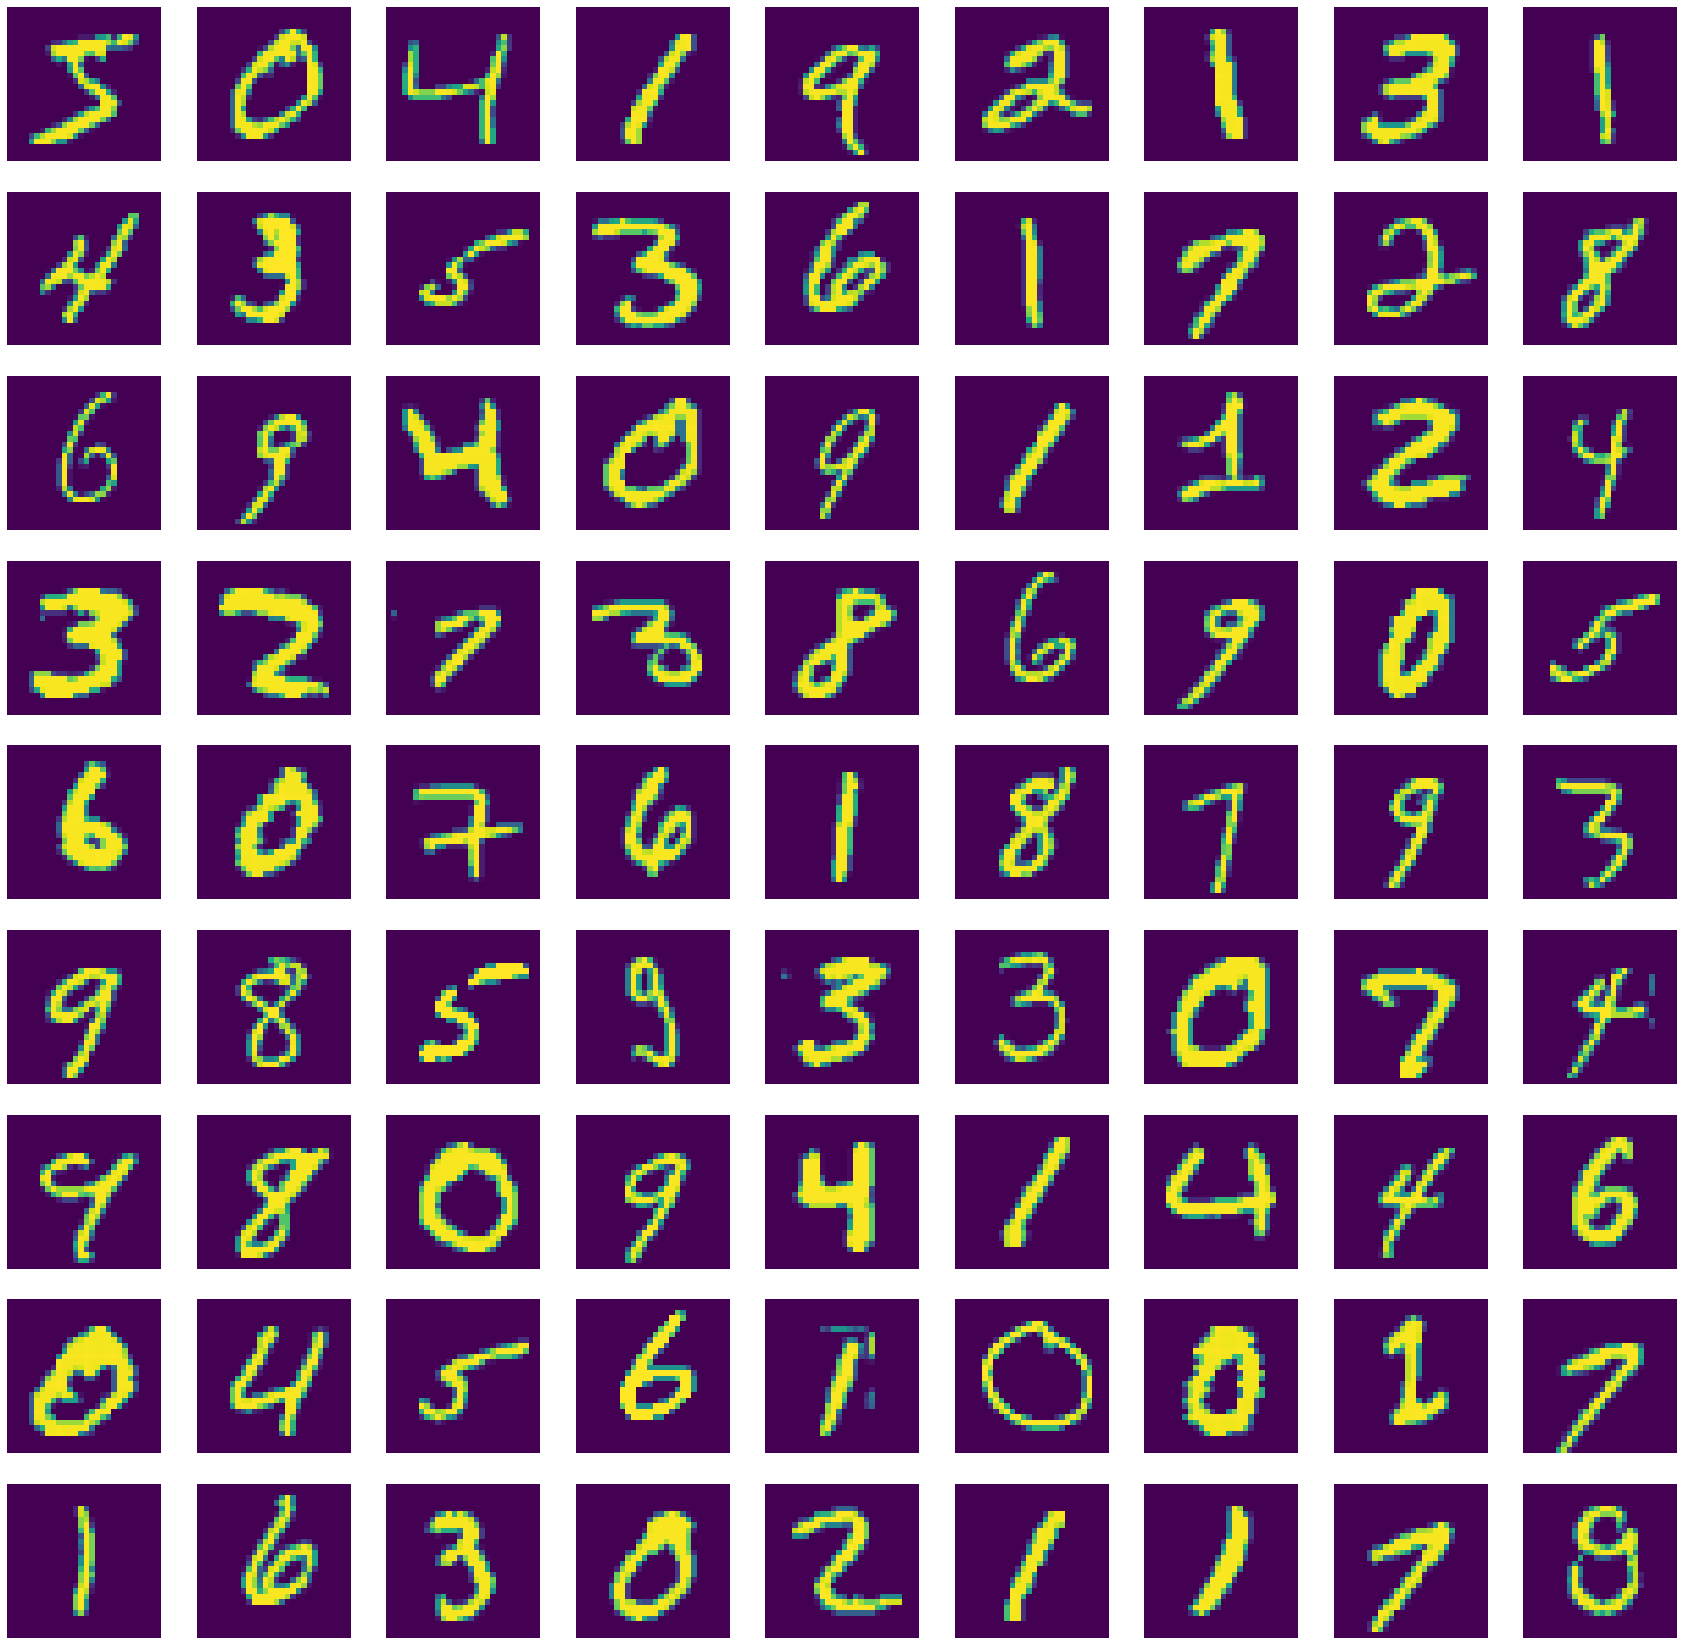

In [ ]:
fig, axes = plt.subplots(9,9, figsize = (30,30) )
for (Test, ax) in zip(X, axes.flatten()):
  ax.imshow(Test)
  ax.axis('off')

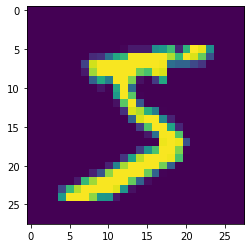

In [ ]:
plt.imshow(X[0], interpolation='nearest')
plt.show()